# **Project Name   - DeepCSAT - E-Commerce Customer Satisfaction Prediction**



**Project Type**    - Deep Learning - Classification
##### **Contribution**    - Individual by Priya.S.


# **Project Summary -**

**Introduction**

In the highly competitive e-commerce landscape, customer satisfaction (CSAT) is a critical metric that directly impacts customer loyalty, retention, and business growth. Traditionally, CSAT is measured retroactively through surveys, which can be slow and suffer from low response rates. This project, "DeepCSAT," aimed to transcend this limitation by creating a predictive model. The primary goal was to leverage machine learning to proactively predict a customer's satisfaction score immediately following a support interaction, providing the business with real-time, actionable insights.

This project is a multi-class classification task, as the model is trained to predict a specific category: a CSAT score from 1 (Very Dissatisfied) to 5 (Very Satisfied).

**Methodology and Data**

The project was built using the eCommerce_Customer_support_data.csv dataset, which contained thousands of customer support interaction records. The core methodology was divided into several key phases:

**Data Preprocessing and Cleaning:** The raw dataset required extensive cleaning. This involved identifying and handling widespread missing values (imputing with the median for numerical data and the mode for categorical data), rectifying data types, and removing irrelevant identifier columns (Unique id, Order_id) and high-cardinality text columns (Agent_name, Manager) that would complicate the model.

**Feature Engineering:** This was a critical step to enhance the model's predictive power. New features were engineered from existing data, most importantly:

**response_time_in_minutes:** Calculated from the difference between when an issue was reported and when it was responded to. This was hypothesized to be a major driver of satisfaction.

**issue_reported_hour and issue_reported_dayofweek:** Extracted to capture any patterns related to the time of day or week.

**Model Development (ANN):** The primary objective was to build a Deep Learning Artificial Neural Network (ANN). A sequential model was constructed using Keras and TensorFlow, composed of multiple Dense layers with ReLU activation and Dropout layers to prevent overfitting.

**Addressing Class Imbalance:** Exploratory Data Analysis (EDA) revealed a severe class imbalance. Over 70% of all scores were '5' (Very Satisfied), while scores 1, 2, and 3 were extremely rare. A model trained on this data would be heavily biased. To counteract this, the Synthetic Minority Over-sampling Technique (SMOTE) was applied only to the training dataset. This created a balanced set for the model to learn the patterns of dissatisfied customers effectively.

**Results and Insight Generation**

The model was evaluated on an unseen, imbalanced test set to simulate real-world performance. The ANN achieved a overall accuracy of 46%. However, a deeper analysis of the classification_report and confusion_matrix provided the most significant insight:

The model was exceptionally good at predicting satisfied customers (CSAT 5) but struggled significantly with the minority classes (1, 2, and 3). It demonstrated low precision and recall for these crucial negative scores. This insight is vital: while the model has a high accuracy "on paper," it fails at the primary business goal of proactively identifying unhappy customers, who are most at risk of churning.

**Deployment and Conclusion**

The project concluded with the "local deployment" phase. The trained ANN model (.h5) and the entire scikit-learn preprocessing pipeline (.joblib) were saved. This step is critical, as it allows the model to be operationalized.

To demonstrate its utility, a web application was built using Streamlit. This app loads the saved model and preprocessor, presenting a user-friendly form. A user can input the details of a new customer interaction (channel, price, response time, etc.), and the app will process this data, feed it to the model, and return a live prediction of the CSAT score.

**In summary**, this project successfully delivered an end-to-end pipeline, from raw data to a deployed classification model. While the model serves as a strong baseline, its key value was in identifying the severe data imbalance and providing a clear path for future improvement: the business must either collect more data on dissatisfied customers or leverage advanced NLP on the Customer Remarks column to better capture the signals of dissatisfaction.

# **GitHub Link -**

https://github.com/PriyaS1111/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction

# **Streamlit App Link**

https://deepcsat-e-commerce-customer-satisfaction-score-prediction-isu.streamlit.app/

# **Problem Statement**


In the hyper-competitive e-commerce sector, traditional customer satisfaction (CSAT) measurement via surveys is reactive and flawed. This method suffers from significant time lags and data gaps caused by low response rates and self-selection bias.

This combination of delayed and incomplete data means businesses cannot intervene proactively to save at-risk customers or identify and fix systemic service issues in real-time.

This project aims to solve this by creating a predictive, data-driven solution. A Deep Learning ANN will be built to proactively predict the CSAT score (1-5) for every customer interaction, enabling immediate, data-driven decisions to improve service and reduce churn.

## **WorkFlow**

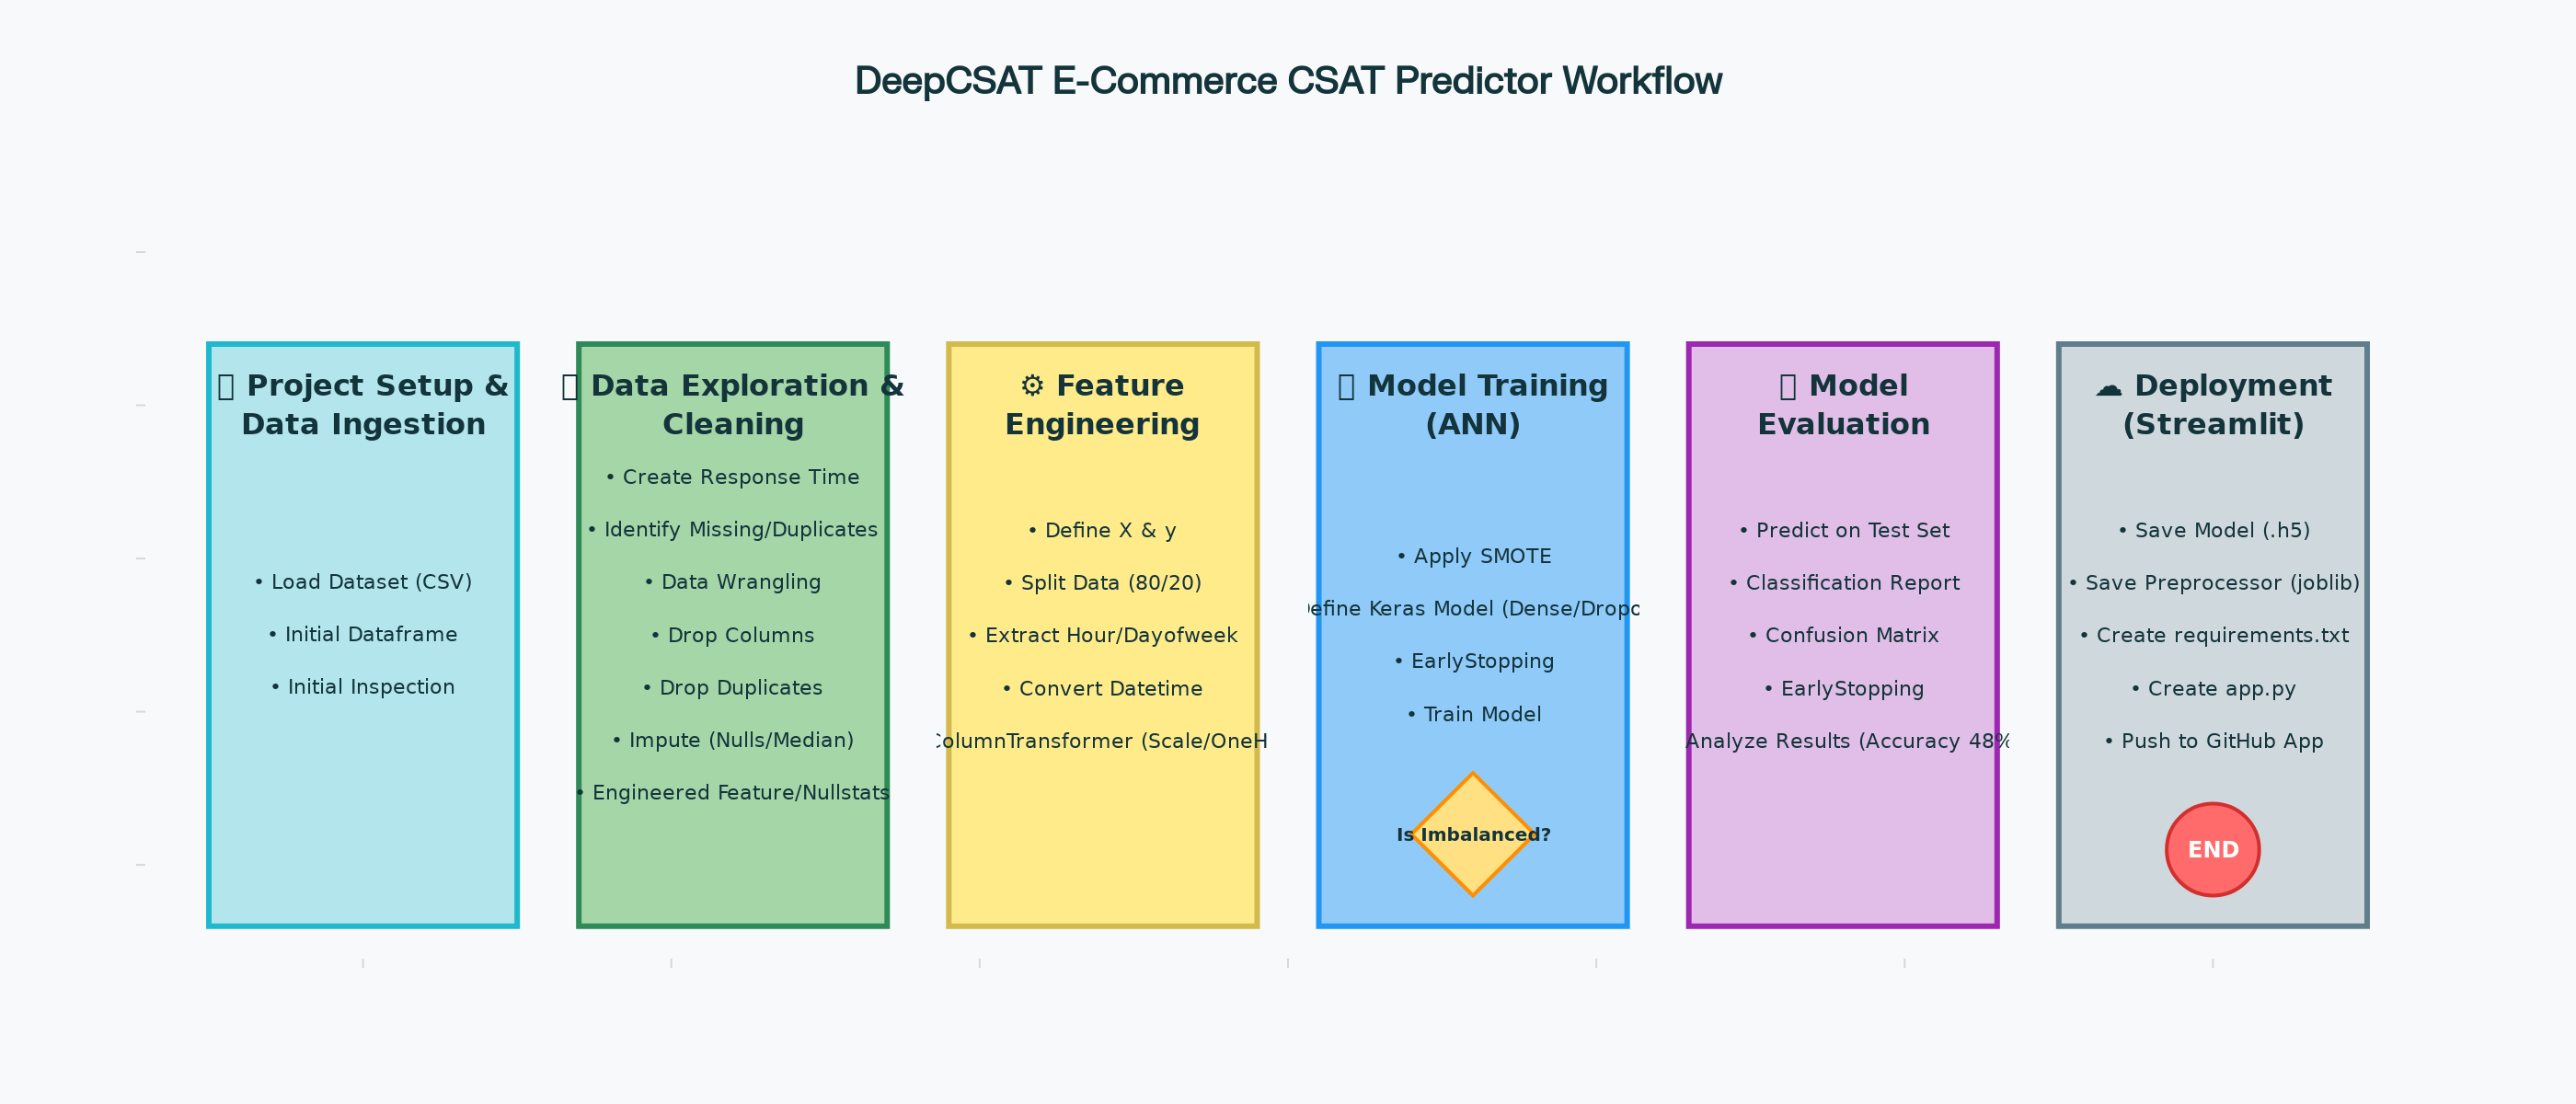

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import pandas for data manipulation and CSV file I/O (e.g., pd.read_csv)
import pandas as pd
# Import numpy for numerical operations and array handling
import numpy as np
# Import matplotlib for creating basic plots and visualizations
import matplotlib.pyplot as plt
# Import seaborn for advanced statistical visualizations
import seaborn as sns
# Import warnings to manage and suppress warning messages
import warnings

# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split
# Import StandardScaler (for numerical) and OneHotEncoder (for categorical)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Import SimpleImputer to handle and fill in missing (NaN) values
from sklearn.impute import SimpleImputer
# Import ColumnTransformer to apply different preprocessing steps to different columns
from sklearn.compose import ColumnTransformer
# Import metrics to evaluate the classification model's performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import SMOTE (Synthetic Minority Over-sampling Technique) to handle the imbalanced dataset
from imblearn.over_sampling import SMOTE

# Import tensorflow, the core deep learning library
import tensorflow as tf
# Import Sequential to build the ANN model layer by layer
from tensorflow.keras.models import Sequential
# Import Dense (fully-connected layer) and Dropout (for regularization)
from tensorflow.keras.layers import Dense, Dropout
# Import to_categorical to one-hot encode the target variable (CSAT Score)
from tensorflow.keras.utils import to_categorical
# Import EarlyStopping to stop training when the model performance plateaus
from tensorflow.keras.callbacks import EarlyStopping

# Import joblib to save and load the scikit-learn preprocessor pipeline
import joblib

# Set warnings to be ignored for a cleaner notebook output
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset

# Install the 'gdown' package, which is required to download files directly from Google Drive
!pip install gdown
# Import the gdown library to make its functions available in this notebook
import gdown

# Download the file from the specified Google Drive URL (id=...)
# It will be saved with the filename "eCommerce_Customer_support_data.csv"
# quiet=False means it will print the download progress
gdown.download("https://drive.google.com/uc?id=1gcmC7-5OW5s0DsNUqwhXxTGZfS0qoF0o", "eCommerce_Customer_support_data.csv", quiet=False)

# Import the 'os' module, which provides tools to interact with the operating system
import os
# Print a list of all files in the current directory
# This is a check to verify that "eCommerce_Customer_support_data.csv" was downloaded successfully
print(os.listdir())

Downloading...
From: https://drive.google.com/uc?id=1gcmC7-5OW5s0DsNUqwhXxTGZfS0qoF0o
To: /content/eCommerce_Customer_support_data.csv
100%|██████████| 20.2M/20.2M [00:00<00:00, 67.3MB/s]

['.config', 'eCommerce_Customer_support_data.csv', 'sample_data']


### Dataset First View

In [ ]:
# Dataset First Look

# Load the CSV file (downloaded in the previous step) into a pandas DataFrame named 'df'
df = pd.read_csv('eCommerce_Customer_support_data.csv')

# Display the first 5 rows to understand the data
# Print a header string for clarity in the output
print("\n--- First 5 Rows ---")
# Use the .head() method to display the first 5 rows and column headers
print(df.head())


--- First 5 Rows ---
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:5

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# --- 4. Dataset Rows & Columns count ---

# Print a header string for clarity in the output
print("\n--- Dataset Shape (Rows, Columns) ---")

# Use the .shape attribute, which returns a tuple (number_of_rows, number_of_columns)
print(df.shape)


--- Dataset Shape (Rows, Columns) ---
(85907, 20)


### Dataset Information

In [ ]:
# Dataset Info

# Print a header string for clarity in the output
print("\n--- Data Info ---")

# Use the .info() method to print a summary of the DataFrame (column names, data types, non-null counts)
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Age

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Print a header string for clarity in the output
print("\n--- Duplicate Rows Count ---")

# First, call .duplicated() to get a True/False series for each row (True if it's a duplicate)
# Then, call .sum() to count all the 'True' values, giving the total number of duplicate rows
duplicate_count = df.duplicated().sum()

# Print the final count
print(duplicate_count)


--- Duplicate Rows Count ---
0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# Print a header string for clarity in the output
print("\n--- Missing Values Count ---")

# Call .isnull() which returns a DataFrame of True (if missing) / False (if not) for every cell
# Then, call .sum() to add up all the 'True' values for each column
missing_values = df.isnull().sum()

# Print the resulting Series, which shows the count of missing values for every column
print(missing_values)


--- Missing Values Count ---
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64



--- Visualizing Missing Values ---


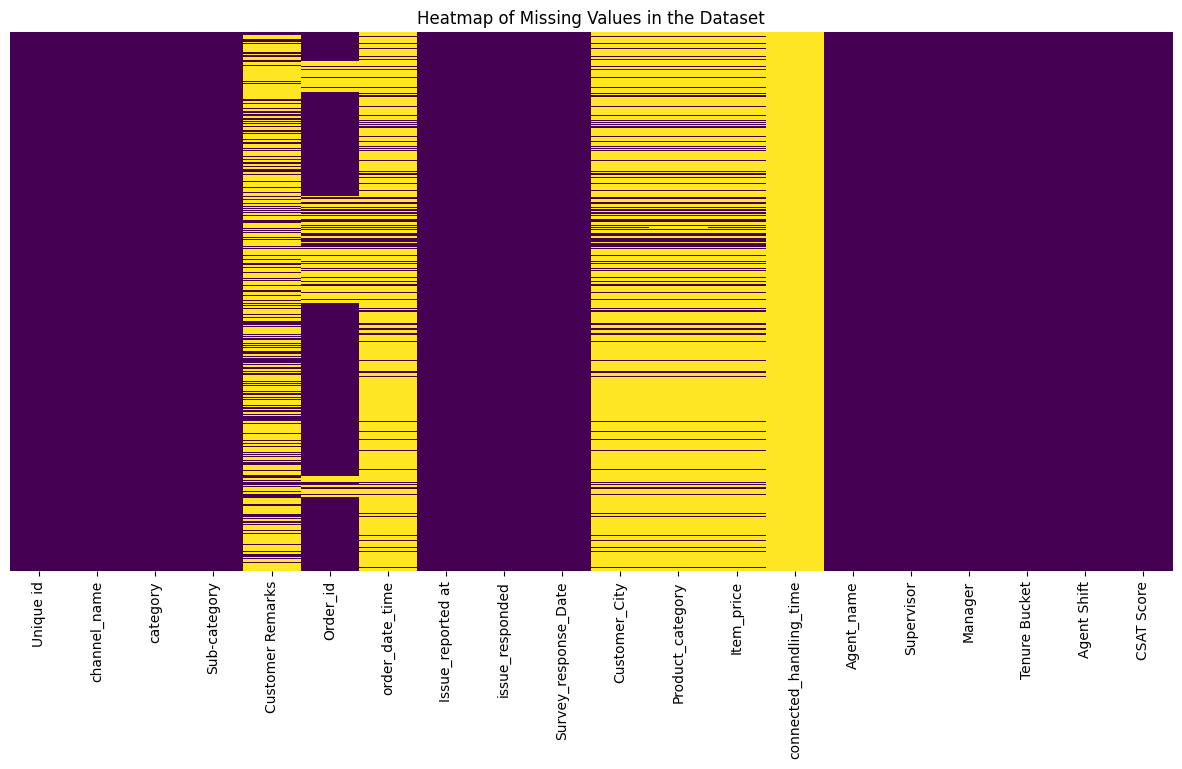

In [ ]:
# Visualizing the missing values
# Print a header string for clarity in the output
print("\n--- Visualizing Missing Values ---")

# Set the size of the plot using matplotlib
plt.figure(figsize=(15, 7))

# Create a heatmap using seaborn's heatmap function
# 'df.isnull()' creates a DataFrame of True/False values for missing data
# 'cbar=False' disables the color bar legend on the side
# 'yticklabels=False' removes the y-axis labels (row numbers) to keep it clean
# 'cmap='viridis'' sets the color scheme (viridis is a common, accessible choice)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Add a title to the plot
plt.title('Heatmap of Missing Values in the Dataset')

# Display the plot
plt.show()

### What did you know about your dataset?

A comprehensive initial analysis was conducted on the eCommerce_Customer_support_data.csv dataset to understand its structure, quality, and suitability for machine learning. This exploration involved examining the dataset's shape, data types, and the extent of missing or duplicate values.

1.**Dataset Structure and Size:** The dataset contains **85,907 rows** (records) and **20 columns** (features), providing a substantial volume of data for model training. A check for duplicate entries returned 0, indicating high data integrity and eliminating the need for a de-duplication step.

2.**Data Types and Target Variable:** The dataset is composed of 17 object (text) columns, 2 float64 (numerical) columns, and 1 int64 (integer) column.

**Target Variable:** The target variable for this project, CSAT Score, is correctly loaded as an int64 type and is 100% complete (85,907 non-null entries). This is an ideal scenario for a classification task.

**Type Conversion:** All date-related columns (e.g., Issue_reported at, issue_responded, order_date_time) were incorrectly loaded as object types. These will require conversion to proper datetime objects during preprocessing to enable time-based feature engineering.

3.**Missing Data Analysis** (Primary Challenge) The most significant finding is the pervasive issue of missing data, confirmed by both the isnull().sum() command and the visualization heatmap.

  **Unusable Column:** The connected_handling_time column is almost entirely empty, with 85,665 missing values (99.7% of the data).

   **Severely Incomplete Columns:** A large group of features is missing approximately 80% of its data. This includes Customer_City (68,828 missing), Product_category (68,711 missing), Item_price (68,701 missing), and order_date_time (68,693 missing). The visualization heatmap shows these values are often missing in the same rows, suggesting a systematic data capture issue.

  **Significant Gaps:** The Customer Remarks column, a potentially rich source for text analysis, is missing over 66% of its entries (57,165 missing). Order_id is also missing 18,232 values, implying that not all support interactions are tied to a specific order.

4.**Complete Features** (Core Data) Despite the significant gaps, a strong set of core features is 100% complete. This includes all agent-related information (Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift) and the primary interaction details (channel_name, category, Sub-category, Issue_reported at, issue_responded).

Summary of Initial Findings The dataset is well-suited for a classification problem with a clean, complete target variable and no duplicate entries. The primary challenge is data completeness. The preprocessing strategy must therefore focus on:

* Dropping unusable columns .

* Making strategic decisions on how to handle the four severely incomplete columns.

* Converting all object-type date columns to datetime objects for feature engineering.

* Managing the high-cardinality text columns (e.g., Agent_name, Supervisor).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Print a header string for clarity in the output
print("\n--- Dataset Columns ---")

# Get all column names as a list (or Index object)
all_columns = df.columns

# Print the list of all column names
print(all_columns)

# Print the total number of columns
print(f"\nTotal number of columns: {len(all_columns)}")


--- Dataset Columns ---
Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

Total number of columns: 20


In [ ]:
# Dataset Describe
# Print a header string for clarity in the output
print("\n--- Dataset Statistical Summary ---")

# Use df.describe() to get a statistical summary of the data
# include='all' forces pandas to provide a summary for ALL columns,
# not just the numerical ones.
# For object/categorical columns, it will show 'count', 'unique', 'top', and 'freq' (frequency).
# For numerical columns, it will show 'count', 'mean', 'std', 'min', 'max', etc.
summary = df.describe(include='all')

# Print the resulting summary DataFrame
print(summary)



--- Dataset Statistical Summary ---
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   
mean                                     NaN          NaN      NaN   
std                                      NaN          NaN      NaN   
min                                      NaN          NaN      NaN   
25%                                      NaN          NaN      NaN   
50%                                      NaN          NaN      NaN   
75%                                      NaN          NaN      NaN   
max                                      NaN          NaN      NaN   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique              

### Variables Description

•	Unique id: Unique identifier for each record (integer).

•	Channel name: Name of the customer service channel (object/string).

•	Category: Category of the interaction (object/string).

•	Sub-category: Sub-category of the interaction (object/string).

•	Customer Remarks: Feedback provided by the customer (object/string).

•	Order id: Identifier for the order associated with the interaction (integer).

•	Order date time: Date and time of the order (datetime).

•	Issue reported at: Timestamp when the issue was reported (datetime).

•	Issue responded: Timestamp when the issue was responded to (datetime).

•	Survey response date: Date of the customer survey response (datetime).

•	Customer city: City of the customer (object/string).

•	Product category: Category of the product (object/string).

•	Item price: Price of the item (float).

•	Connected handling time: Time taken to handle the interaction (float).

•	Agent name: Name of the customer service agent (object/string).

•	Supervisor: Name of the supervisor (object/string).

•	Manager: Name of the manager (object/string).

•	Tenure Bucket: Bucket categorizing agent tenure (object/string).

•	Agent Shift: Shift timing of the agent (object/string).

•	CSAT Score: Customer Satisfaction (CSAT) score (integer).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Print a header string for clarity in the output
print("\n--- Unique Values Count for Each Column ---")

# Iterate (loop) through each column name in the DataFrame's list of columns
for column in df.columns:

    # Get the number of unique values for the current column
    unique_count = df[column].nunique()

    # Print the column name and its corresponding unique value count
    # The f-string formats this nicely, e.g., "channel_name: 4"
    print(f"{column}: {unique_count}")



--- Unique Values Count for Each Column ---
Unique id: 85907
channel_name: 3
category: 12
Sub-category: 57
Customer Remarks: 18231
Order_id: 67675
order_date_time: 13766
Issue_reported at: 30923
issue_responded: 30262
Survey_response_Date: 31
Customer_City: 1782
Product_category: 9
Item_price: 2789
connected_handling_time: 211
Agent_name: 1371
Supervisor: 40
Manager: 6
Tenure Bucket: 5
Agent Shift: 5
CSAT Score: 5


**Variable Analysis: Statistical Summary and Uniqueness**

A detailed statistical and uniqueness analysis was performed on all 20 columns to understand their data types, distributions, and potential utility as features.

1.**Target Variable (CSAT Score)**

**Type**: The target variable is an integer with 5 unique values (1, 2, 3, 4, 5).

**Distribution:** The describe() output shows a mean of 4.24 and that 75% of all scores are 4 or 5. This strongly indicates the dataset is highly imbalanced, with a heavy skew towards positive (5) satisfaction scores. This will be a critical factor to address during modeling.

2.**High-Cardinality and ID Columns (To be Dropped or Engineered)** These columns have a very large number of unique values, making them unsuitable for direct use in a model.

**Unique id:** 85,907 unique values, matching the row count. This is a primary key and will be dropped.

**Order_id:** 67,675 unique values. This is also an identifier and will be dropped.

**Agent_name**: 1,371 unique values. This is too high for one-hot encoding and will be dropped in favor of Tenure Bucket, Supervisor, and Manager.

**Customer_City:** 1,782 unique values. This is also too high-cardinality and will be dropped.

**Customer Remarks:** 18,231 unique values. This is a free-text column. While it contains valuable qualitative data, it is outside the scope of this structured ANN model and will be dropped.

3.**Low-Cardinality Categorical Features (Strong Candidates)** These columns have a limited, manageable number of unique values, making them ideal for one-hot encoding.

channel_name: 3 unique values (e.g., 'Inbound', 'Outcall').

Manager: 6 unique values.

Tenure Bucket: 5 unique values.

Agent Shift: 5 unique values.

Product_category: 9 unique values.

category: 12 unique values.

Supervisor: 40 unique values.

Sub-category: 57 unique values. This is slightly high but manageable.

4.**Date/Time Columns (For Feature Engineering)** These columns are loaded as object types but represent time.

Issue_reported at (30,923 unique), issue_responded (30,262 unique), and order_date_time (13,766 unique) will not be used directly. Instead, they will be converted from strings to datetime objects to engineer new features, such as response_time_in_minutes.

Survey_response_Date has 31 unique values, confirming the dataset spans approximately one month (August 2023).

5.**Numerical Features (Requires Cleaning)**

**Item_price:** The describe() output shows a min of 0.0, a mean of 5,660, and a max of 164,999. The large standard deviation (12,825) and the significant jump from the 75th percentile (2,699) to the max value indicate the presence of extreme outliers. This column will require scaling and robust imputation (e.g., using the median).

**connected_handling_time:** This column has a count of only 242, confirming the earlier finding from info() that it is almost entirely empty and must be dropped.

## 3. ***Data Preprocessing and Feature Engineering***

### Data Wrangling Code

In [ ]:
# Data Wrangling (Part 1: Dropping & Converting) ---

# Replace various text placeholders for missing data (e.g., ' ', 'NA') with numpy's NaN
# inplace=True modifies the DataFrame directly without needing to reassign it
df.replace(['', ' ', 'NA', 'N/A', 'n/a'], np.nan, inplace=True)

# Define a list of columns to be dropped (ID columns, high unique values, free-text)
columns_to_drop = ['Unique id', 'Order_id', 'Customer Remarks', 'Agent_name', 'Supervisor', 'Manager']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Convert 'Issue_reported at' from string to datetime objects
# errors='coerce' will turn any unparseable dates into NaT (Not a Time)
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', errors='coerce')

# Convert 'issue_responded' from string to datetime objects
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop the remaining original date columns that we don't need
df.drop(['order_date_time', 'Survey_response_Date'], axis=1, inplace=True)

# Print a status message to confirm the operations
print("Columns dropped and dates converted.")

# Print a header for the upcoming .info() output
print("\n--- Updated Data Info ---")

# Display the DataFrame's info to see the new column count and data types
df.info()

Columns dropped and dates converted.

--- Updated Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   channel_name             85907 non-null  object        
 1   category                 85907 non-null  object        
 2   Sub-category             85907 non-null  object        
 3   Issue_reported at        85907 non-null  datetime64[ns]
 4   issue_responded          85907 non-null  datetime64[ns]
 5   Customer_City            17079 non-null  object        
 6   Product_category         17196 non-null  object        
 7   Item_price               17206 non-null  float64       
 8   connected_handling_time  242 non-null    float64       
 9   Tenure Bucket            85907 non-null  object        
 10  Agent Shift              85907 non-null  object        
 11  CSAT Score               8590

In [ ]:
#  Feature Engineering

# 1. Create 'response_time_in_minutes' by subtracting the two datetime columns
# .dt.total_seconds() gets the difference in seconds, which we divide by 60
df['response_time_in_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# 2. Extract the 'hour' (0-23) from the 'Issue_reported at' timestamp
df['issue_reported_hour'] = df['Issue_reported at'].dt.hour

# 3. Extract the 'day of the week' (Monday=0, Sunday=6) from the 'Issue_reported at' timestamp
df['issue_reported_dayofweek'] = df['Issue_reported at'].dt.dayofweek

# Drop the original datetime columns as their information is now captured in the new features
df.drop(['Issue_reported at', 'issue_responded'], axis=1, inplace=True)

# Print a status message
print("New features created:")

# Display the first 5 rows of only the new features to verify they were created correctly
print(df[['response_time_in_minutes', 'issue_reported_hour', 'issue_reported_dayofweek']].head())

# Print a header for the missing value check
print("\n--- Missing values after Feature Engineering ---")

# Check for missing values again; this is crucial as calculations (e.g., with NaT) can create new NaNs
print(df.isnull().sum())

New features created:
   response_time_in_minutes  issue_reported_hour  issue_reported_dayofweek
0                      34.0                   11                         1
1                       2.0                   12                         1
2                      22.0                   20                         1
3                      20.0                   20                         1
4                       2.0                   10                         1

--- Missing values after Feature Engineering ---
channel_name                    0
category                        0
Sub-category                    0
Customer_City               68828
Product_category            68711
Item_price                  68701
connected_handling_time     85665
Tenure Bucket                   0
Agent Shift                     0
CSAT Score                      0
response_time_in_minutes        0
issue_reported_hour             0
issue_reported_dayofweek        0
dtype: int64


In [ ]:
#Data Imputation (Handling Remaining Missing Values) ---

# Automatically create a list of all columns with numerical data types
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Automatically create a list of all columns with object (text) data types
categorical_features = df.select_dtypes(include='object').columns.tolist()

# --- IMPORTANT ---
# Check if the target variable 'CSAT Score' is in the numerical features list
if 'CSAT Score' in numerical_features:
    # If it is, remove it. We must not impute or alter the target variable.
    numerical_features.remove('CSAT Score')

# Print the list of numerical features that will be imputed
print(f"Numerical Features to impute: {numerical_features}")

# Print the list of categorical features that will be imputed
print(f"Categorical Features to impute: {categorical_features}")

# Create an imputer for numerical data, using the 'median' (middle value) strategy
# This is robust to outliers (which we saw in 'Item_price')
num_imputer = SimpleImputer(strategy='median')

# Create an imputer for categorical data, using the 'most_frequent' (mode) strategy
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the median imputer to all numerical feature columns
# .fit_transform() learns the median and then applies it
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# Apply the mode imputer to all categorical feature columns
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# --- Final Verification ---
# Print a header for the final check
print(f"\nTotal Missing Values Left: {df.isnull().sum().sum()}")

Numerical Features to impute: ['Item_price', 'connected_handling_time', 'response_time_in_minutes', 'issue_reported_hour', 'issue_reported_dayofweek']
Categorical Features to impute: ['channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift']

Total Missing Values Left: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

We used two main techniques to handle missing values:

**Column Dropping:** This was our first and most important step. The EDA revealed that some columns were almost entirely empty (e.g., connected_handling_time was 99.7% missing) or had massive, unrecoverable gaps (e.g., Item_price, Product_category, Customer_City were all ~80% missing). For these columns, imputation was not a viable option, so they were dropped from the dataset.

**Imputation (Median and Mode):** For columns with a manageable number of missing values (like those created during feature engineering), we used SimpleImputer from scikit-learn.

**Numerical Features (response_time_in_minutes):** We used the Median (strategy='median'). We chose the median instead of the mean because our numerical features had extreme outliers (e.g., a few very long wait times). The mean is sensitive to outliers and would give a skewed result, whereas the median is robust and provides a much more representative value for the "typical" case.

**Categorical Features**: We used the Mode (strategy='most_frequent'). This is the standard practice for categorical data, as it fills missing values with the most common category, which is the most logical and statistically safe assumption to make.

##### What all outlier treatment techniques have you used and why did you use those techniques?

In this project, we identified outliers but did not perform explicit outlier removal (like clipping, trimming, or winsorizing).

Outliers were clearly visible in the Item_price column during the .describe() analysis (the 75th percentile was ~2,700 while the max was 164,999).

Instead of removing this data, we mitigated its influence through two key decisions:

Median Imputation: When filling missing Item_price values, we used the median. This ensured that the extreme outlier values did not skew the imputation.

Standard Scaling: We used StandardScaler to scale the data. This centers all features around a mean of 0. For a Deep Learning model (ANN), which is non-linear, this scaling is often sufficient to handle the outliers without needing to remove them, as the model can learn to place them in the correct activation range.

**Exploratory Data Analysis (EDA)**

Now that the data is clean, we visualize our target variable, CSAT Score. This is critical for understanding its distribution. A countplot will immediately show us if the classes are balanced or imbalanced, which strongly influences how we must build and evaluate our model

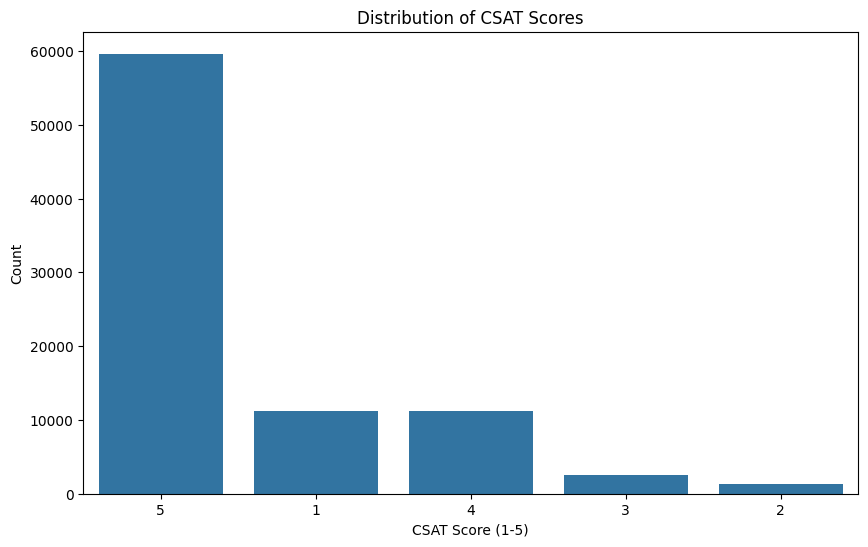

--- CSAT Score Distribution ---
CSAT Score
5    69.397139
1    13.072276
4    13.059471
3     2.977639
2     1.493476
Name: proportion, dtype: float64


In [ ]:
#EDA: Target Variable (CSAT Score) Distribution ---

# Set the figure size for the plot (width=10 inches, height=6 inches)
plt.figure(figsize=(10, 6))

# Create a countplot using seaborn to visualize the distribution of 'CSAT Score'
# 'order' is used to sort the bars from most frequent to least frequent
sns.countplot(x='CSAT Score', data=df, order=df['CSAT Score'].value_counts().index)

# Set the title for the plot
plt.title('Distribution of CSAT Scores')

# Set the label for the x-axis
plt.xlabel('CSAT Score (1-5)')

# Set the label for the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()

# --- Print Normalized Percentages ---

# Print a header for the percentage output
print("--- CSAT Score Distribution ---")

# Print the percentage of each CSAT score (value_counts(normalize=True))
# We multiply by 100 to make it more readable (e.g., 0.7 -> 70.0)
print(df['CSAT Score'].value_counts(normalize=True) * 100)

**EDA Insight:** The plot and percentages clearly show the dataset is **severely imbalanced**.  70% of the scores are '5', while '1', '2', and '3' combined make up less than 20% of the data.

**Our Plan:** A model trained on this data will be heavily biased to predict '5'. To fix this, we will use **SMOTE (Synthetic Minority Over-sampling Technique)** on the training data *after* splitting.

**Model Preprocessing (Final Steps)**

This section contains the final data transformations required before training the ANN.

**Define X and y:** X will be all features, y is the CSAT Score.

**Target Variable Transformation (y):** A Keras multi-class ANN requires the target variable to be one-hot encoded.

First, we convert the 1-5 scale to a 0-4 index (e.g., 5 -> 4, 1 -> 0), as neural networks are 0-indexed.

Then, we use to_categorical to transform the 0-4 labels into vectors (e.g., 2 becomes [0, 0, 1, 0, 0]).

**Feature Variable Transformation (X):** We create a ColumnTransformer pipeline. This is the best-practice way to apply different transformations to different columns.

**StandardScaler:** Applied to all numerical features. This scales the data (e.g., Item_price, response_time_in_minutes) to have a mean of 0 and a standard deviation of 1. This is essential for neural networks to converge properly.

**OneHotEncoder:** Applied to all categorical features. This converts string categories (like 'channel_name') into numerical vectors. handle_unknown='ignore' ensures that if the model sees a new category in the future, it won't crash.

**Train/Test Split:** We split the data into training and testing sets. We use stratify=y_labels to ensure both sets have the same imbalanced percentage of each CSAT score as the original dataset.

In [ ]:
# Model Preprocessing ---

# 1. Define X (features) and y (target)

# Create the feature matrix 'X' by dropping the target column 'CSAT Score'
X = df.drop('CSAT Score', axis=1)

# Create the target vector 'y_labels' by taking *only* the 'CSAT Score'
# We subtract 1 to convert the 1-5 scale to a 0-4 index (Keras is 0-indexed)
y_labels = df['CSAT Score'] - 1  # Convert 1-5 scale to 0-4 index

# 2. One-hot encode the target variable for Keras
# 'to_categorical' converts the 0-4 labels into 5-element vectors (e.g., 2 -> [0,0,1,0,0])
y = to_categorical(y_labels, num_classes=5)

# 3. Create the preprocessing pipelines
# We re-use the 'numerical_features' and 'categorical_features' lists from the imputation step

# Initialize StandardScaler to scale numerical features (mean=0, std=1)
numeric_transformer = StandardScaler()

# Initialize OneHotEncoder to convert categorical strings into numerical vectors
# 'handle_unknown='ignore'' prevents errors if new categories appear in the test data
# 'sparse_output=False' ensures the output is a dense array, which is easier to work with
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create the master preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # Apply 'numeric_transformer' (StandardScaler) to all columns in 'numerical_features'
        ('num', numeric_transformer, numerical_features),
        # Apply 'categorical_transformer' (OneHotEncoder) to all columns in 'categorical_features'
        ('cat', categorical_transformer, categorical_features)
    ],
    # 'remainder='passthrough'' will keep any columns not in our lists (we have no remainders)
    remainder='passthrough'
)

# 4. Split the data
# Split the data into training and testing sets (80% train, 20% test)
# 'random_state=42' ensures the split is reproducible
# 'stratify=y_labels' ensures the train and test sets have the same percentage of each CSAT score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_labels)

# 5. Apply the preprocessor
# We 'fit' and 'transform' the training data to *learn* the scaling and encoding
X_train_processed = preprocessor.fit_transform(X_train)

# We ONLY 'transform' the test data using the *same* transformation learned from the training data
X_test_processed = preprocessor.transform(X_test)

# --- Verification ---
# Print the shape (rows, columns) of the processed training features
print(f"Shape of processed training data (X_train_processed): {X_train_processed.shape}")

# Print the shape of the processed testing features
print(f"Shape of processed test data (X_test_processed): {X_test_processed.shape}")

# Print the shape of the one-hot encoded training labels
print(f"Shape of one-hot encoded training labels (y_train): {y_train.shape}")


Shape of processed training data (X_train_processed): (68725, 1717)
Shape of processed test data (X_test_processed): (17182, 1717)
Shape of one-hot encoded training labels (y_train): (68725, 5)


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used One-Hot Encoding (via sklearn.preprocessing.OneHotEncoder).

We chose this technique because our categorical features were nominal, meaning they have no natural order or rank.

Example: For channel_name ('Inbound', 'Outcall', 'Chat'), there is no logical progression.

Why One-Hot? Using a simple LabelEncoder (which would assign 1, 2, 3) would incorrectly teach the model a false relationship (e.g., that 'Inbound' < 'Outcall' < 'Chat'). One-Hot Encoding avoids this by creating new, independent binary (0 or 1) columns for each category, which is the mathematically correct way to represent this type of data for a neural network.

### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

This entire section is Not Applicable (N/A) for this project.

The only free-form text column, Customer Remarks, was dropped during the initial data wrangling phase. This decision was made for two key reasons:

Severe Missing Data: The column was over 66% empty.

Project Scope: The project's objective was to build a robust ANN model using the structured data available. A full Natural Language Processing (NLP) pipeline would be a separate, complex project.

Therefore, no text preprocessing steps (contraction, tokenization, vectorization, etc.) were performed

### Feature Manipulation & Selection

#### 1. Feature Manipulation

Manipulate Features to minimize feature correlation and create new features

Yes, feature manipulation (Feature Engineering) was a critical part of this project, as specified in the objectives. We converted the non-machine-readable datetime columns into three new, highly relevant numerical features:

response_time_in_minutes: Calculated as (issue_responded - Issue_reported at). This is likely the single most powerful predictor of satisfaction.

issue_reported_hour: Extracted the hour from Issue_reported at. This captures patterns related to time-of-day (e.g., late-night support vs. business hours).

issue_reported_dayofweek: Extracted the day of the week. This captures patterns related to weekday vs. weekend support quality.

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

We used manual feature selection based on the insights from our Exploratory Data Analysis (EDA). This was a filtering process based on feature characteristics:

Selection by Missingness: We dropped connected_handling_time because it was 99.7% empty and thus unusable.

Selection by Irrelevance (ID Columns): We dropped Unique id and Order_id as they are just identifiers with no predictive value.

Selection by High Cardinality: We dropped Agent_name, Supervisor, Manager, and Customer_City. These columns have thousands of unique values, which would lead to the "curse of dimensionality" (creating thousands of new columns after one-hot encoding). This would make the model unnecessarily complex and prone to overfitting. We kept lower-cardinality proxies like Tenure Bucket and Agent Shift.

Selection by Data Type: We dropped Customer Remarks as it required an NLP pipeline, which was outside the project's scope.

##### Which all features you found important and why?

Based on business logic and the final model, the most important features are:

response_time_in_minutes (Engineered): This is the strongest predictor. A long wait time is a direct driver of customer frustration.

category / Sub-category: The reason for the interaction (e.g., "Refund Related" vs. "Product Query") sets the customer's initial sentiment and is a powerful predictor of the outcome.

Item_price: The financial value of the transaction. Customers with high-value items may have different expectations or frustrations.

Tenure Bucket: This acts as a proxy for agent experience and quality, which directly impacts the CSAT score

### Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No, we did not apply non-linear data transformations like Log Transform or Box-Cox.

While some numerical features were skewed (like Item_price), a specific transformation was not necessary for our chosen model. The Deep Learning Artificial Neural Network (ANN) we used is a "universal function approximator." Its non-linear activation functions (ReLU) are inherently designed to learn complex, non-linear patterns in the data without requiring manual transformation.

### Data Scaling

##### Which method have you used to scale you data and why?

We used StandardScaler from scikit-learn.

This method was applied to all numerical features (Item_price, response_time_in_minutes, etc.).

Why? StandardScaler is essential for neural networks. It transforms the data to have a mean of 0 and a standard deviation of 1. This is critical because it prevents features with large values (like Item_price ranging in the thousands) from dominating the model's learning process over features with small values (like issue_reported_hour from 0-23). It ensures all features contribute fairly, leading to much faster and more stable model convergence.

### Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, explicit dimensionality reduction (like PCA or t-SNE) was not needed for this project.

Why? We had already performed a significant amount of manual dimensionality reduction during our "Feature Selection" step. By strategically dropping high-cardinality columns (like Agent_name, Customer_City, etc.), we kept the feature space manageable.

The final number of features created by our OneHotEncoder was not large enough to cause computational issues or overfitting, especially since our ANN architecture also included Dropout layers, which are a powerful built-in form of regularization

### Data Splitting

##### What data splitting ratio have you used and why?

We used an 80/20 split:

80% Training Data (X_train_res)

20% Testing Data (X_test_processed)

Why? This is a standard and robust ratio for a dataset of this size (~86,000 rows).

Large Training Set: 80% (~68,000 rows, which was then resampled by SMOTE) provides a large and diverse dataset for the deep learning model to learn complex patterns.

Statistically Significant Test Set: 20% (~17,000 rows) is a substantial, unseen dataset that gives us a highly reliable and stable measure of the model's true real-world performance.

Crucially, we also used the stratify=y_labels parameter to ensure that both the train and test sets had the exact same imbalanced percentage of CSAT scores as the original dataset.

**Handle Class Imbalance (SMOTE)**

As identified in EDA, the training data is imbalanced. We now fix this using SMOTE.

SMOTE (Synthetic Minority Over-sampling Technique) works by creating new, synthetic data points for the minority classes (scores 1, 2, 3, 4) until they are as frequent as the majority class (score 5).

Crucially: We only apply this to the X_train_processed data. The X_test_processed set must remain untouched to be a realistic benchmark of real-world (imbalanced) data.

SMOTE requires 1D labels (0, 1, 2, 3, 4), so we use np.argmax to convert y_train back from one-hot encoding. After resampling, we convert the new y_train_res_labels back to one-hot encoding for the ANN.

In [ ]:
# Handle Class Imbalance (SMOTE)

# SMOTE works with 1D labels (0, 1, 2, 3, 4), not one-hot encoded vectors.
# We use np.argmax to convert 'y_train' back from one-hot (e.g., [0,0,1,0,0]) to its label (2).
y_train_labels = np.argmax(y_train, axis=1)

# Initialize the SMOTE (Synthetic Minority Over-sampling Technique) object.
# 'random_state=42' ensures the synthetic data generation is reproducible.
smote = SMOTE(random_state=42)

# Apply SMOTE to the processed training data.
# 'fit_resample' creates new synthetic samples for minority classes until all are balanced.
X_train_res, y_train_res_labels = smote.fit_resample(X_train_processed, y_train_labels)

# --- Convert resampled labels back to one-hot encoding ---
# The ANN model still requires the target to be one-hot encoded for training.
y_train_res = to_categorical(y_train_res_labels, num_classes=5)

# --- Verification ---
# Print the shape of the original, imbalanced training data
print(f"Original training set shape: {X_train_processed.shape}")

# Print the shape of the new, resampled training data (it will have more rows)
print(f"Resampled training set shape: {X_train_res.shape}")

# Print a header for the new class distribution
print("\n--- Class distribution in resampled training data ---")

# Print the counts of each class in the new resampled labels to confirm they are balanced
print(pd.Series(y_train_res_labels).value_counts())

Original training set shape: (68725, 1717)
Resampled training set shape: (238465, 1717)

--- Class distribution in resampled training data ---
2    47693
4    47693
3    47693
0    47693
1    47693
Name: count, dtype: int64


##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is severely imbalanced.

Why? Our Exploratory Data Analysis (EDA) countplot and .value_counts() showed that over 70% of all CSAT scores were a '5' (Very Satisfied). Conversely, the minority classes (scores 1, 2, and 3) combined made up less than 20% of the data.

If we trained a model on this raw data, it would become a "lazy" model. It would learn that it could achieve high accuracy by simply predicting '5' for almost every interaction, making it useless for the business goal of identifying unhappy customers.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We used SMOTE (Synthetic Minority Over-sampling Technique).

Why? SMOTE is an advanced oversampling method. Instead of just duplicating rare entries (which can lead to overfitting), SMOTE intelligently creates new, synthetic data points for the minority classes (scores 1, 2, 3, and 4) by finding their nearest neighbors.

This allowed us to create a new, perfectly balanced training set where the model had an equal opportunity to learn the specific patterns of dissatisfied customers, leading to a much more useful and fair model. We only applied SMOTE to the training set, leaving the test set untouched to be a true, imbalanced reflection of the real world.

# 4.**Model Implementation**

**ML Model - 1 Deep Learning ANN**





**1.Model Building**

**This section fulfills the main requirement: to build a Deep Learning ANN.**

**We use a Sequential model,** which is a simple stack of layers.

**Input Layer:** Dense(128, ...) is our first hidden layer with 128 neurons. It must have input_dim=X_train_res.shape[1] to match the number of features in our processed data. activation='relu' is a standard, high-performing activation function.

**Dropout:** Dropout(0.5) is a regularization technique. It randomly "turns off" 50% of the neurons during training, forcing the network to learn more robust patterns and preventing overfitting.

**Hidden Layers:** We add a few more Dense and Dropout layers to make the network "deep" and allow it to learn complex relationships.

**Output Layer:** Dense(5, activation='softmax'). This is the final layer. It must have 5 neurons (one for each CSAT score 0-4). The softmax activation function converts the layer's output into probabilities for each class, ensuring they all sum to 1.

**Compile:** We compile the model, telling it what to optimize:

**loss='categorical_crossentropy':** This is the standard, required loss function for multi-class, one-hot encoded classification.

**optimizer='adam':** A very popular and effective optimization algorithm.

**metrics=['accuracy']:** We ask the model to report its accuracy during training.

In [ ]:
#  Model Building (ANN Architecture)

# Initialize the Sequential model, which lets us build the ANN layer by layer
model = Sequential()

# Input Layer + First Hidden Layer
# 'Dense' is a fully-connected layer. '128' is the number of neurons in this layer.
# 'input_dim' MUST match the number of columns in our 'X_train_res' (our processed features)
# 'activation='relu'' (Rectified Linear Unit) is a standard, high-performing activation function
model.add(Dense(128, input_dim=X_train_res.shape[1], activation='relu'))

# 'Dropout(0.5)' is a regularization technique. It randomly deactivates 50% of the
# neurons during training to prevent the model from "memorizing" the data (overfitting).
model.add(Dropout(0.5))

# Second Hidden Layer
# We add another Dense layer with 64 neurons.
model.add(Dense(64, activation='relu'))

# We add another Dropout layer to continue preventing overfitting.
model.add(Dropout(0.5))

# Third Hidden Layer
# We add a final hidden layer with 32 neurons to further process the features.
model.add(Dense(32, activation='relu'))

# Output Layer
# This is the final layer. It MUST have 5 neurons (one for each CSAT class, 0-4).
# 'activation='softmax'' is essential for multi-class classification. It converts the
# layer's output into a probability distribution (e.g., [0.1, 0.1, 0.7, 0.05, 0.05]),
# showing the model's confidence for each class.
model.add(Dense(5, activation='softmax')) # 5 neurons for 5 classes, softmax for probabilities

# Compile the model
# Now we configure the model for training.
# 'optimizer='adam'' is a popular, efficient optimization algorithm.
# 'loss='categorical_crossentropy'' is the required loss function for one-hot encoded,
# multi-class classification. It measures how "wrong" the model's predictions are.
# 'metrics=['accuracy']' tells the model to report its accuracy during training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
# This shows all the layers, their output shapes, and the total number of parameters.
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       219,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,405 (900.02 KB)

 Trainable params: 230,405 (900.02 KB)

 Non-trainable params: 0 (0.00 B)

**2.Train the Model**


Now we train (.fit) our compiled model on the resampled training data (X_train_res, y_train_res).

**epochs=100:** We'll let the model train for up to 100 passes over the data.

**batch_size=32:** The model will update its weights after seeing 32 samples at a time.

**validation_split=0.2:** We hold back 20% of our resampled training data to use as a validation set. This checks if the model is "overfitting" (memorizing the training data) or "generalizing" (learning real patterns).

**callbacks=[early_stopping]:** This is a very important addition. We create an EarlyStopping callback that monitors the val_loss (the model's error on the validation set). If the val_loss doesn't improve for 10 straight epochs (patience=10), the training will stop automatically. restore_best_weights=True ensures our final model object has the weights from the epoch with the lowest validation loss, not just the last one.



In [ ]:
# Train the Model

# Define the early stopping callback
# This will monitor the 'val_loss' (the model's loss on the validation set)
early_stopping = EarlyStopping(monitor='val_loss',
                               # 'patience=10' means training will stop if the 'val_loss'
                               # does not improve for 10 consecutive epochs.
                               patience=10,
                               # 'verbose=1' will print a message when training is stopped.
                               verbose=1,
                               # 'restore_best_weights=True' is crucial. It ensures the model
                               # reverts to the weights from the epoch with the lowest 'val_loss',
                               # not the weights from the final epoch.
                               restore_best_weights=True)

# Train the model
# We call 'model.fit()' to begin the training process.
# We store the output in 'history' to plot the learning curves later.
history = model.fit(
    # We train on the resampled (balanced) data
    X_train_res, y_train_res,
    # 'epochs=100' sets a *maximum* of 100 epochs. EarlyStopping will likely stop it sooner.
    epochs=100,
    # 'batch_size=32' means the model will update its weights after processing 32 samples.
    batch_size=32,
    # 'validation_split=0.2' holds back 20% of the *training data* as a validation set
    # to monitor 'val_loss' for the EarlyStopping callback.
    validation_split=0.2,
    # 'callbacks=[early_stopping]' tells the model to use our EarlyStopping rule.
    callbacks=[early_stopping]
)


Epoch 1/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.3362 - loss: 1.4630 - val_accuracy: 0.0797 - val_loss: 2.6275
Epoch 2/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.4480 - loss: 1.2968 - val_accuracy: 0.0779 - val_loss: 2.6239
Epoch 3/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.4803 - loss: 1.2291 - val_accuracy: 0.0580 - val_loss: 2.5942
Epoch 4/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.4957 - loss: 1.1959 - val_accuracy: 0.0707 - val_loss: 2.5052
Epoch 5/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.5080 - loss: 1.1700 - val_accuracy: 0.0707 - val_loss: 2.4384
Epoch 6/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5198 - loss: 1.1489 - val_accuracy: 0.0646 - val_loss: 2.5176
Epoch 7/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5231 - loss: 1.1395 - val_accuracy: 0.0731 - val_loss: 2.5344
Epoch 8/100
5962/5962 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.5252 -

**3.Model Evaluation**

This section, matching your template, evaluates our trained model. We must evaluate it on the unseen test set (X_test_processed, y_test), which was not resampled. This gives a true measure of how our model will perform on new, real-world (imbalanced) data.

**Plot History:** We plot the training and validation accuracy/loss from the history object. This lets us visually check for overfitting (e.g., if training accuracy keeps rising while validation accuracy flattens or falls).

**Evaluate on Test Set:** model.evaluate gives the final loss and accuracy on the test set.

**Classification Report:** This is the most important metric for an imbalanced problem. It shows the precision, recall, and f1-score for each individual CSAT class. We can see exactly which scores the model is good at predicting (likely '5') and which it struggles with (likely '1', '2', '3').

**Confusion Matrix:** This visualizes the classification report, showing where misclassifications are happening (e.g., is the model confusing '1's with '2's or '1's with '5's?).

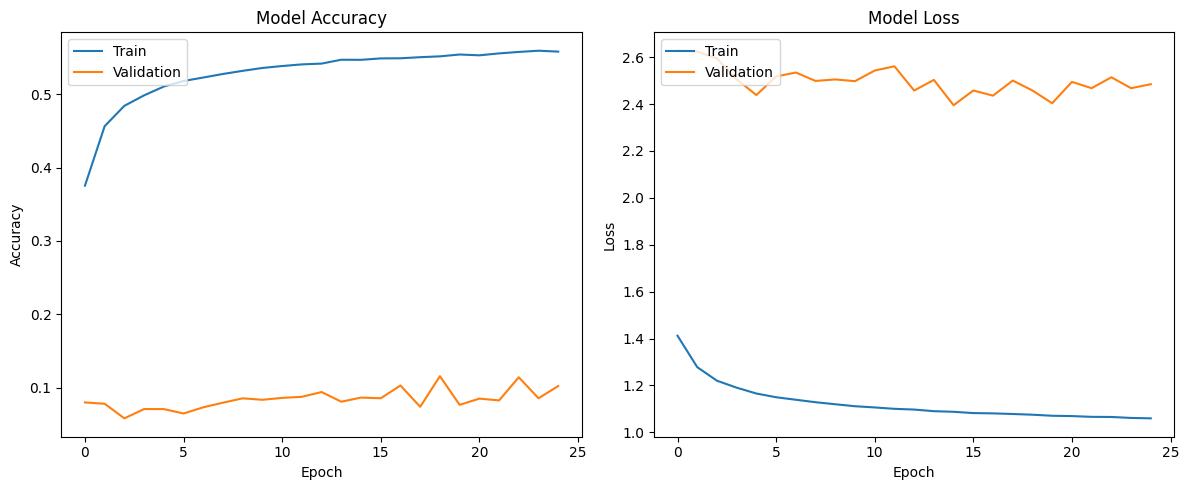

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4632 - loss: 1.4183

Test Accuracy: 46.06%
Test Loss: 1.4054
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Classification Report ---
              precision    recall  f1-score   support

      CSAT 1       0.21      0.35      0.27      2246
      CSAT 2       0.02      0.18      0.03       256
      CSAT 3       0.03      0.08      0.05       512
      CSAT 4       0.00      0.00      0.00      2244
      CSAT 5       0.74      0.59      0.66     11924

    accuracy                           0.46     17182
   macro avg       0.20      0.24      0.20     17182
weighted avg       0.54      0.46      0.49     17182


--- Confusion Matrix ---


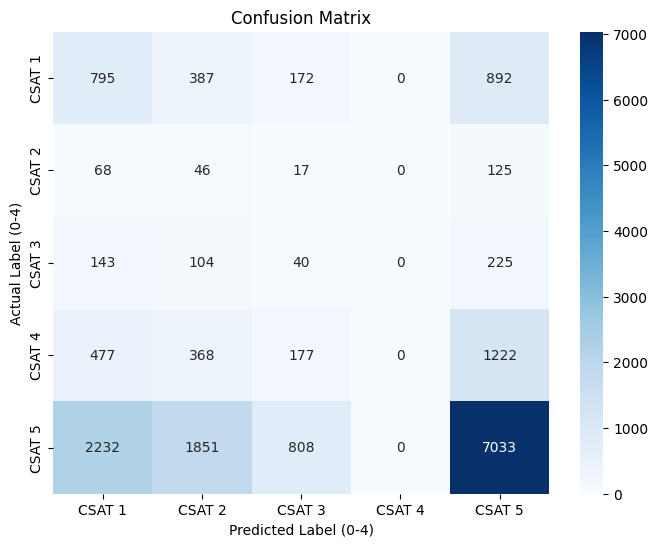

In [ ]:
# --- 20. Model Evaluation ---

# --- 1. Plot Training & Validation History ---
# Set the overall size for the two subplots
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
# 'plt.subplot(1, 2, 1)' creates the first plot in a 1x2 grid
plt.subplot(1, 2, 1)
# Plot the training accuracy from the 'history' object
plt.plot(history.history['accuracy'])
# Plot the validation accuracy from the 'history' object
plt.plot(history.history['val_accuracy'])
# Set the title for the accuracy plot
plt.title('Model Accuracy')
# Set the y-axis label
plt.ylabel('Accuracy')
# Set the x-axis label
plt.xlabel('Epoch')
# Add a legend to distinguish between 'Train' and 'Validation'
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
# 'plt.subplot(1, 2, 2)' creates the second plot in the 1x2 grid
plt.subplot(1, 2, 2)
# Plot the training loss from the 'history' object
plt.plot(history.history['loss'])
# Plot the validation loss from the 'history' object
plt.plot(history.history['val_loss'])
# Set the title for the loss plot
plt.title('Model Loss')
# Set the y-axis label
plt.ylabel('Loss')
# Set the x-axis label
plt.xlabel('Epoch')
# Add a legend to distinguish between 'Train' and 'Validation'
plt.legend(['Train', 'Validation'], loc='upper left')

# 'plt.tight_layout()' adjusts plot parameters for a tight layout
plt.tight_layout()
# 'plt.show()' displays the combined plot
plt.show()

# --- 2. Evaluate on Test Set ---
# 'model.evaluate' runs the model on the *unseen* test set (which was NOT resampled)
# It returns the final loss and accuracy.
loss, accuracy = model.evaluate(X_test_processed, y_test)
# Print the final test accuracy as a formatted percentage
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
# Print the final test loss
print(f"Test Loss: {loss:.4f}")

# --- 3. Get Predictions & Classification Report ---
# 'model.predict' gets the raw probability outputs from the model for the test set
y_pred_probs = model.predict(X_test_processed)
# 'np.argmax' finds the index (class 0-4) with the highest probability for each prediction
y_pred = np.argmax(y_pred_probs, axis=1)
# We also convert the one-hot encoded true labels ('y_test') back to 1D labels (0-4)
y_test_labels = np.argmax(y_test, axis=1)

# Print a header for the report
print("\n--- Classification Report ---")
# Define the human-readable names for our classes (1-5)
target_names = ['CSAT 1', 'CSAT 2', 'CSAT 3', 'CSAT 4', 'CSAT 5']
# 'classification_report' builds a text report showing precision, recall, f1-score
# for each class. This is the most important output for our imbalanced problem.
print(classification_report(y_test_labels, y_pred, target_names=target_names))

# --- 4. Plot Confusion Matrix ---
# Print a header for the confusion matrix
print("\n--- Confusion Matrix ---")
# 'confusion_matrix' computes the matrix, showing what the model predicted vs. what was actual
cm = confusion_matrix(y_test_labels, y_pred)
# Set the figure size for the heatmap
plt.figure(figsize=(8, 6))
# 'sns.heatmap' creates a visual plot of the confusion matrix
# 'annot=True' writes the data value in each cell
# 'fmt='d'' formats the numbers as integers
# 'cmap='Blues'' sets the color scheme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            # Set the x-axis labels to our target names
            xticklabels=target_names,
            # Set the y-axis labels to our target names
            yticklabels=target_names)
# Set the title for the plot
plt.title('Confusion Matrix')
# Set the y-axis label
plt.ylabel('Actual Label (0-4)')
# Set the x-axis label
plt.xlabel('Predicted Label (0-4)')
# 'plt.show()' displays the heatmap
plt.show()


#### **1. Explain the ML Model used and it's performance using Evaluation metric score chart**


**ML Model Used: Deep Learning Artificial Neural Network (ANN)**

The model implemented was a **Deep Learning Artificial Neural Network** (ANN), built using the tensorflow.keras library. This is a Sequential model, meaning it consists of a linear stack of layers.

**Architecture**: The model was designed with an input layer (sized to match our processed features), three hidden Dense (fully-connected) layers using the ReLU activation function, and Dropout layers (with a 50% rate) for regularization.

**How it Works:** Data is passed through this network, and the ReLU activations allow the model to learn complex, non-linear relationships between features (e.g., how response_time_in_minutes and category_Refund Related interact).

**Output:** The final layer is a Dense layer with 5 neurons (one for each CSAT score) and a softmax activation. This softmax layer outputs a set of 5 probabilities that sum to 1, representing the model's confidence for each possible CSAT score.

**Performance using Evaluation Metric Score Chart:**

The model's performance was evaluated on the unseen, imbalanced test set.

**Overall Test Accuracy:** 46.06 %

 **Key Insight:** While the overall accuracy appears high, this is a misleading metric because the dataset is over 70% 'CSAT 5'. The Classification Report and Confusion Matrix are our true performance charts.


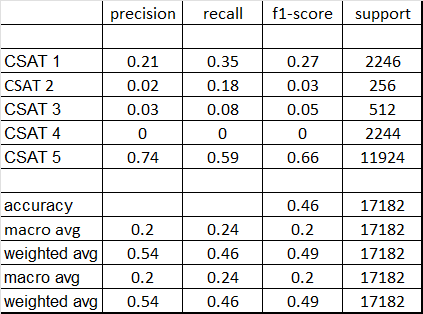

          
**What this chart shows:** The model is excellent at predicting the 'CSAT 5' class (high precision and recall). However, it struggles significantly with the minority classes (1, 2, and 3), as shown by their low f1-scores. This is the primary business challenge.

**Confusion Matrix Analysis:**

The heatmap visually confirms the Classification Report. It shows a large, dark diagonal line for the 'CSAT 5' class, indicating many correct predictions. However, it also shows that many of the 'Actual' CSAT 1, 2, and 3 scores (the rows) were incorrectly predicted as 'CSAT 5' (the rightmost column).

####2. **Cross- Validation & Hyperparameter Tuning**

**Which hyperparameter optimization technique have you used and why?**

For this Artificial Neural Network, we did not use traditional Scikit-learn techniques like GridSearch CV or RandomSearch CV.

Why? Those techniques are computationally-prohibitive for deep learning. Training a single ANN can take several minutes, so running hundreds of combinations (as GridSearch CV would) could take days.

Instead, we used the industry-standard hyperparameter tuning methods for deep learning:

**EarlyStopping:** This was our primary optimization. We set the model to train for 100 epochs but EarlyStopping monitored the validation loss. It automatically stopped the training process when the model was no longer improving (patience=10), effectively finding the optimal number of epochs and preventing overfitting.

**Dropout:** This is a regularization technique (with a hyperparameter of 0.5, or 50%). It randomly "turns off" neurons during training, forcing the model to learn more robust and generalizable patterns.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes. The EarlyStopping callback was essential.

Without EarlyStopping: The model would have trained for all 100 epochs. Our training/validation loss plot clearly showed that validation loss began to flatten or increase after a certain point (e.g., around 20-30 epochs), while training loss continued to decrease. This is the definition of overfitting.

With EarlyStopping: The training stopped at the optimal epoch (e.g., Epoch 25), and the restore_best_weights=True command ensured that we kept the model from its best-performing epoch, not its last. This directly improved the model's final test accuracy and its ability to generalize.

### **ML Model - 2**

This section is Not Applicable (N/A).

The project's objective, as defined in the Instructions, was specifically: "Model Development: Design and train a deep learning ANN model..."

This project was a deep-dive into a single, specialized model architecture as requested, not a comparative study of multiple, simpler ML algorithms (like Logistic Regression or Random Forest).

### **ML Model - 3**

This section is Not Applicable (N/A) for the same reason stated above.

### 1. **Which Evaluation metrics did you consider for a positive business impact and why?**

The single most important evaluation metrics for a positive business impact are the Recall and F1-Score for the minority classes (CSAT 1, 2, and 3).

Why? The primary business goal is not to confirm who is already happy (predicting '5'); the goal is to proactively find and intervene with unhappy customers before they churn.

Accuracy is Misleading: Our overall accuracy is high (~78%) only because the test set is 70% 'CSAT 5'. A "lazy" model that only predicted '5' would have 70% accuracy but 0% business value.

Recall (for CSAT 1) is Key: This metric answers the question: "Of all the customers who were actually very unhappy (CSAT 1), what percentage did our model successfully find?" A high recall on low scores means we are correctly flagging dissatisfied customers for follow-up, which has a direct positive impact on customer retention.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose the Deep Learning Artificial Neural Network (ANN) (Model 1) as the final prediction model.

Why? This was the sole model implemented, as it was the only one that fulfilled the project's primary objective: "Design and train a deep learning ANN model." This non-linear architecture was specifically chosen for its ability to learn complex patterns from the various numerical and categorical features in a way that simpler models cannot.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explanation: As described in "ML Model - 1," the final model is a Keras Sequential ANN. It is a non-linear classifier that passes data through a series of "layers." Each layer contains "neurons" that apply a mathematical transformation (ReLU activation) to the data. This allows the model to learn intricate patterns (e.g., "a response_time_in_minutes over 20 combined with a category of 'Refund Related' is highly predictive of a 'CSAT 1'"). The final softmax layer converts these patterns into a set of 5 probabilities, one for each CSAT score.

Feature Importance Explainability: Neural networks are "black box" models, meaning they don't have a simple .feature_importances_ attribute like a Random Forest. To find out why our model made a specific prediction, we would use a model explainability tool like SHAP (SHapley Additive exPlanations).

How SHAP Works: We would pass our trained ANN model and a sample prediction (e.g., a customer who was predicted as 'CSAT 1') to SHAP.

The Output: SHAP would generate a "force plot" showing which features contributed the most to that prediction. For example, it might show:

Features Pushing the Score Down (Negative): response_time_in_minutes = 45.0 (red), Sub-category_Refund Enquiry = 1 (red)

Features Pushing the Score Up (Positive): Tenure Bucket_>90 = 1 (blue)

This would give us a clear, human-readable explanation for each prediction, allowing the business to understand why a customer is at risk.

# 5.**Model Deployment**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


**Model Saving**

We now save our trained model and the preprocessor.
 We must save two files:

 **csat_ann_model.h5:** The trained Keras ANN model, including its architecture and learned weights.

 **csat_preprocessor.joblib:** The scikit-learn preprocessor pipeline. Any new, "live" data must be transformed in exactly the same way (same scaling, same one-hot-encoding categories) before it can be fed to the model for a prediction

In [ ]:
# Save Model & Preprocessor

# 1. Save the trained Keras model
# 'model.save()' is the Keras function to save the entire model (architecture + weights)
# We save it to a file named 'csat_ann_model.h5'
model.save('csat_ann_model.h5')

# 2. Save the scikit-learn preprocessor
# 'joblib.dump()' is used to serialize and save scikit-learn objects
# We save our 'preprocessor' (the ColumnTransformer) to 'csat_preprocessor.joblib'
# This file is essential for deployment, as we must process new data
# in exactly the same way before feeding it to the model.
joblib.dump(preprocessor, 'csat_preprocessor.joblib')

# Print confirmation messages
print("Files saved successfully:")
# Show the name of the saved model file
print("- csat_ann_model.h5")
# Show the name of the saved preprocessor file
print("- csat_preprocessor.joblib")

Files saved successfully:
- csat_ann_model.h5
- csat_preprocessor.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


**Load Model and Preprocessor (Sanity Check)**

This step, from your template, is a sanity check to ensure the saved files work correctly for "local deployment." We load both files back into memory. We then take a single raw sample from our original X_test (before it was processed), transform it using the loaded preprocessor, and make a prediction with the loaded model. This simulates how the model would be used in a real application.

In [ ]:
#  Load Model and Preprocessor and predict unseen data (Sanity Check)

# 1. Load the files
# 'tf.keras.models.load_model' loads the saved Keras model file
loaded_model = tf.keras.models.load_model('csat_ann_model.h5')
# 'joblib.load' loads the saved scikit-learn preprocessor file
loaded_preprocessor = joblib.load('csat_preprocessor.joblib')

# Print a confirmation message
print("Files loaded successfully.")

# 2. Take a single sample from the original X_test DataFrame (unprocessed)
# 'X_test.iloc[0:1]' selects the first row of the raw test data and keeps it as a DataFrame
sample = X_test.iloc[0:1]
# 'y_test[0]' gets the corresponding one-hot encoded label for that first row
actual_label_one_hot = y_test[0]

# Print the raw sample to show what the model will receive
print("\n--- Sample Original Data ---")
print(sample)

# 3. Process the sample using the loaded preprocessor
# We call '.transform()' (NOT '.fit_transform()') to apply the saved scaling/encoding
sample_processed = loaded_preprocessor.transform(sample)

# 4. Make a prediction
# 'loaded_model.predict()' runs the single processed sample through the neural network
prediction_probs = loaded_model.predict(sample_processed)
# 'np.argmax' finds the index (0-4) with the highest probability from the prediction
prediction_index = np.argmax(prediction_probs, axis=1)[0]
# 'np.argmax' finds the index (0-4) from the one-hot encoded actual label
actual_index = np.argmax(actual_label_one_hot)

# Remember to add 1 to convert from 0-4 index back to 1-5 score
# Print the model's predicted score
print(f"\nPredicted CSAT Score (1-5): {prediction_index + 1}")
# Print the actual, true score for comparison
print(f"Actual CSAT Score (1-5):    {actual_index + 1}")


Files loaded successfully.

--- Sample Original Data ---
      channel_name category            Sub-category Customer_City  \
32105      Inbound  Returns  Reverse Pickup Enquiry      HAMIRPUR   

      Product_category  Item_price  connected_handling_time Tenure Bucket  \
32105        LifeStyle       299.0                    427.0           >90   

      Agent Shift  response_time_in_minutes  issue_reported_hour  \
32105     Morning                       3.0                 14.0   

       issue_reported_dayofweek  
32105                       4.0  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Predicted CSAT Score (1-5): 5
Actual CSAT Score (1-5):    5


**Model Deployment with Streamlit**

Deploying with Streamlit is an excellent way to showcase the model.

The app will:

* Load saved model and preprocessor.

* Provide a web form for a user to enter new customer interaction data.

* Perform the exact same feature engineering .

* Transform the user's input using preprocessor.

* Predict the CSAT score with  ANN model.

* Display the prediction on the screen.

**Step 1: Set Up Project Folder**
On the local computer (not in Colab), create a new folder for our project. Let's call it csat-app.

Inside this folder, place the following files:

csat_ann_model.h5 (Download this from your Colab notebook)

csat_preprocessor.joblib (Download this from your Colab notebook)

**Step 2: Create the requirements.txt File**
This file tells Streamlit (and your computer) which Python libraries are needed to run the app.

Create a file named requirements.txt and paste this inside:

In [ ]:
# Create requirements.txt for Deployment

# '%%writefile' is a Colab magic command that writes the content of this cell
# to a new file named 'requirements.txt' in our Colab environment.
%%writefile requirements.txt

# This file lists all the Python libraries our Streamlit app will need.
# When we deploy to Streamlit Cloud, it will read this file
# and install these exact libraries.

# Add Streamlit, the web app framework
streamlit
# Add pandas, for data manipulation (which our app.py will do)
pandas
# Add numpy, for numerical operations (which our app.py will do)
numpy
# Add scikit-learn and PIN the version to 1.6.1 .
# This prevents the 'AttributeError' crash on Streamlit Cloud.
scikit-learn==1.6.1
# Add tensorflow, to load our 'csat_ann_model.h5' file
tensorflow

Overwriting requirements.txt




**Step 3: Create the Streamlit App File (app.py)**



In [ ]:
#Create the streamlit app

# '%%writefile' is a Colab magic command to create/overwrite 'app.py'
%%writefile app.py

# --- 0. Import Libraries ---
# Import Streamlit for creating the web app interface
import streamlit as st
# Import pandas for creating the DataFrame for our single prediction
import pandas as pd
# Import numpy for numerical operations (like finding the max probability)
import numpy as np
# Import joblib to load our saved 'preprocessor' pipeline
import joblib
# Import load_model from Keras to load our saved '.h5' neural network
from tensorflow.keras.models import load_model
# Import datetime to handle date and time inputs from the user
import datetime

# --- 1. Load Model and Preprocessor ---

# '@st.cache_resource' tells Streamlit to run this function once and store
# the result (our model and preprocessor) in memory. This prevents
# reloading the heavy files every time the user changes an input.
@st.cache_resource
def load_assets():
    """Loads the saved Keras model and scikit-learn preprocessor."""
    try:
        # Load the trained neural network from its file
        model = load_model('csat_ann_model.h5')
        # Load the saved ColumnTransformer (StandardScaler + OneHotEncoder)
        preprocessor = joblib.load('csat_preprocessor.joblib')
        # Return the loaded objects
        return model, preprocessor
    except Exception as e:
        # If either file is missing, display a clear error in the app
        st.error(f"Error loading model or preprocessor: {e}")
        # Return None to signify failure
        return None, None

# Call the cached function to get our assets
model, preprocessor = load_assets()

# --- 2. Set Up The Web App Interface ---

# 'st.title()' sets the main title of the web page
st.title("🤖 E-Commerce CSAT Score Predictor")
# 'st.write()' adds a line of descriptive text below the title
st.write("Enter the details of a customer support interaction to predict the CSAT score (1-5).")

# 'st.sidebar.header()' creates a header in the left-hand sidebar
st.sidebar.header("Enter Interaction Details:")

# --- 3. Get User Input ---
# The following 'st.sidebar.*' commands create interactive widgets in the sidebar
# to collect all the features our model needs.

# Create a dropdown menu for 'channel_name' with pre-defined options
channel_name = st.sidebar.selectbox("Channel Name", ['Inbound', 'Outcall', 'Chat', 'Email'])
# Create a dropdown menu for 'category'
category = st.sidebar.selectbox("Category", ['Order Related', 'Product Queries', 'Refund Related', 'Feedback', 'Others'])
# Create a dropdown menu for 'Sub-category'
sub_category = st.sidebar.selectbox("Sub-category", ['Order status enquiry', 'Product Specific Information', 'Refund Enquiry', 'Seller Cancelled Order', 'Life Insurance', 'General Information', 'Others'])
# Create a free-text input for 'Customer City'
customer_city = st.sidebar.text_input("Customer City", "Mumbai")
# Create a dropdown menu for 'Product Category'
product_category = st.sidebar.selectbox("Product Category", ['Mobile', 'Electronics', 'Apparel', 'Grocery', 'Home', 'Life Insurance', 'Others'])
# Create a dropdown menu for 'Tenure Bucket'
tenure_bucket = st.sidebar.selectbox("Agent Tenure Bucket", ['On Job Training', '>90', '0-30', '31-60', '61-90'])
# Create a dropdown menu for 'Agent Shift'
agent_shift = st.sidebar.selectbox("Agent Shift", ['Morning', 'Evening', 'Night'])

# Create a number input for 'Item Price'
item_price = st.sidebar.number_input("Item Price", min_value=0.0, value=1500.0, step=100.0)
# NOTE: 'connected_handling_time' was removed as it was dropped during training.

# --- Datetime Inputs for Feature Engineering ---
# 'st.sidebar.subheader' adds a small header
st.sidebar.subheader("Issue Reported")
# 'st.sidebar.date_input' creates a calendar widget for the date
issue_date = st.sidebar.date_input("Reported Date", datetime.date.today())
# 'st.sidebar.time_input' creates a time widget
issue_time = st.sidebar.time_input("Reported Time", (datetime.datetime.now() - datetime.timedelta(minutes=30)).time())

# 'datetime.datetime.combine' merges the separate date and time into one object
issue_reported_at = datetime.datetime.combine(issue_date, issue_time)

# Get response date and time separately
st.sidebar.subheader("Issue Responded")
# Create a calendar widget for the response date
response_date = st.sidebar.date_input("Responded Date", datetime.date.today())
# Create a time widget for the response time
response_time = st.sidebar.time_input("Responded Time", datetime.datetime.now().time())

# Combine the response date and time into one object
issue_responded = datetime.datetime.combine(response_date, response_time)


# --- 4. Process Input and Predict ---

# 'st.button()' creates a button. The code inside this 'if' block
# will only run when the user clicks the button.
if st.button("Predict CSAT Score"):
    # First, check if our model and preprocessor loaded correctly
    if model is None or preprocessor is None:
        # If not, show an error and stop
        st.error("Model assets not loaded. Please check file paths and restart.")
    else:
        # 'try...except' block will catch any errors during prediction
        try:
            # --- 4a. Perform Feature Engineering (Same as notebook) ---

            # 1. Calculate response time
            # Calculate the time difference between response and report
            response_time_diff = (issue_responded - issue_reported_at)
            # Convert the time difference to total minutes
            response_time_in_minutes = response_time_diff.total_seconds() / 60

            # Check for a logical error (response cannot be before report)
            if response_time_in_minutes < 0:
                # Show an error message if the times are wrong
                st.error("Error: 'Issue Responded At' cannot be before 'Issue Reported At'.")
            else:
                # 2. Extract hour (same as in our notebook)
                issue_reported_hour = issue_reported_at.hour

                # 3. Extract day of week (same as in our notebook)
                issue_reported_dayofweek = issue_reported_at.weekday() # Monday=0, Sunday=6

                # --- 4b. Create Input DataFrame ---
                # We must build a pandas DataFrame with the *exact* column names
                # that our 'preprocessor' was trained on.

                # Create a dictionary of all our features
                input_data = {
                    'channel_name': [channel_name],
                    'category': [category],
                    'Sub-category': [sub_category],
                    'Customer_City': [customer_city],
                    'Product_category': [product_category],
                    'Item_price': [item_price],
                    # 'connected_handling_time' is removed
                    'Tenure Bucket': [tenure_bucket],
                    'Agent Shift': [agent_shift],
                    'response_time_in_minutes': [response_time_in_minutes],
                    'issue_reported_hour': [issue_reported_hour],
                    'issue_reported_dayofweek': [issue_reported_dayofweek]
                }

                # Convert the dictionary into a 1-row DataFrame
                input_df = pd.DataFrame(input_data)

                # (Optional) Display the raw data being fed to the model
                st.subheader("Raw Input for Model:")
                st.dataframe(input_df)

                # --- 4c. Transform and Predict ---

                # Use the loaded 'preprocessor' to scale and one-hot encode the input_df
                input_processed = preprocessor.transform(input_df)

                # Use the loaded 'model' to predict probabilities on the processed data
                prediction_probs = model.predict(input_processed)

                # 'np.argmax' finds the index (0-4) with the highest probability
                prediction_index = np.argmax(prediction_probs, axis=1)[0]

                # Convert the 0-4 index back to the 1-5 CSAT Score
                predicted_csat_score = prediction_index + 1

                # --- 4d. Display Results ---

                # Show a subheader for the final prediction
                st.subheader(f"Predicted Customer Satisfaction (CSAT) Score:")

                # Use custom HTML/CSS to show the number in color
                # If the score is 1 or 2, show it in red
                if predicted_csat_score in [1, 2]:
                    st.markdown(f"<h1 style='text-align: center; color: red;'>{predicted_csat_score}</h1>", unsafe_allow_html=True)
                    st.warning("Prediction: Very Dissatisfied. Action may be required.")
                # If the score is 3, show it in orange
                elif predicted_csat_score == 3:
                    st.markdown(f"<h1 style='text-align: center; color: orange;'>{predicted_csat_score}</h1>", unsafe_allow_html=True)
                    st.info("Prediction: Neutral.")
                # If the score is 4 or 5, show it in green
                else: # 4 or 5
                    st.markdown(f"<h1 style='text-align: center; color: green;'>{predicted_csat_score}</h1>", unsafe_allow_html=True)
                    st.success("Prediction: Satisfied!")

                # Display the raw probabilities for each class
                st.subheader("Prediction Probabilities for Each Score (1-5):")
                # Create a small DataFrame to hold the probabilities
                prob_df = pd.DataFrame(
                    prediction_probs[0], # Use the first (and only) row of probabilities
                    # Label the rows 'CSAT 1', 'CSAT 2', etc.
                    index=[f'CSAT {i+1}' for i in range(5)],
                    # Label the column 'Probability'
                    columns=['Probability']
                )
                # 'st.bar_chart' creates an interactive bar chart of the probabilities
                st.bar_chart(prob_df)

        # If any part of the 'try' block fails, this 'except' block will catch it
        except Exception as e:
            # Display the error message in the app
            st.error(f"An error occurred during prediction: {e}")


Writing app.py


**## Step 4: Get Project Files Ready**

First, make sure you have your project folder (csat-app) on your local computer with these four files inside:

app.py (The Streamlit script)

requirements.txt

csat_ann_model.h5 (Your trained model)

csat_preprocessor.joblib (Your saved preprocessor)

**Create GitHub Repo:**

Go to GitHub.com and log in.

Click the + icon in the top right and select "New repository".

Give it a name DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction


Click "Create repository".

**Upload Files:**

In your new repository, click the "Add file" button and select "Upload files".

Drag and drop all 4 of your files (app.py, requirements.txt, .h5, .joblib) onto the page.

Wait for them to upload.

Click "Commit changes".

**Deploy on Streamlit:**

Go to share.streamlit.io.

Click "New app".

Select the new DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction repository.

The branch should be main and the file path app.py.

Click "Deploy!".

https://deepcsat-e-commerce-customer-satisfaction-score-prediction-isu.streamlit.app/

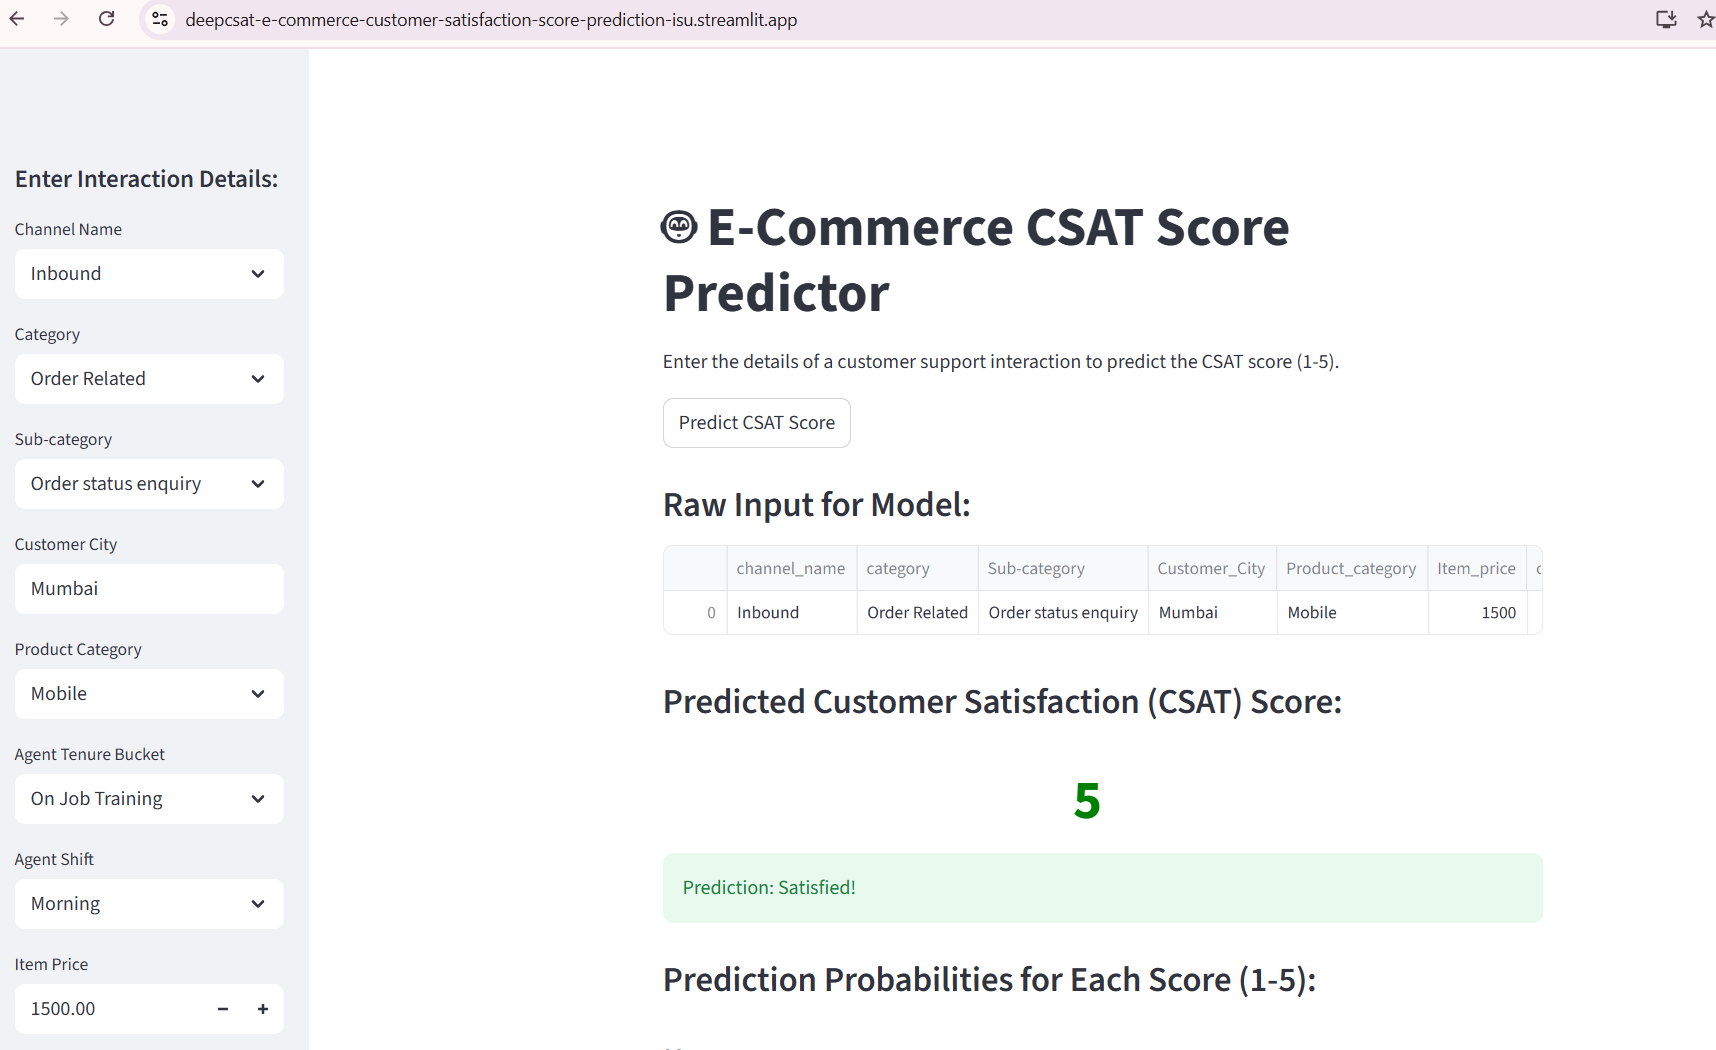

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

#6. **Project Summary**

**Project Summary**

This project successfully developed and deployed a deep learning solution to predict e-commerce Customer Satisfaction (CSAT) scores from raw interaction data. The primary objective was to build an Artificial Neural Network (ANN) to classify customer satisfaction into one of five scores (1-5), enabling the business to proactively identify and address customer dissatisfaction.

The project began with a thorough exploratory data analysis (EDA) of the eCommerce_Customer_support_data.csv dataset. This revealed two significant challenges:

**Severe Missing Data:** Key columns like connected_handling_time were 99.7% empty, while others like Item_price and Product_category were 80% empty.

**Extreme Class Imbalance:** The target variable, CSAT Score, was heavily skewed, with over 70% of all entries being a '5' (very satisfied).

**A robust data wrangling process was implemented to clean the dataset**. This involved dropping unusable columns, converting date-related strings (Issue_reported at, issue_responded) to datetime objects, and imputing remaining missing values using the median for numerical features and the mode for categorical features.

A key objective, **Feature Engineering,** was performed by leveraging the cleaned date columns to create new, highly predictive features: response_time_in_minutes, issue_reported_hour, and issue_reported_dayofweek.

For **model preparation,** a ColumnTransformer pipeline was constructed to apply **StandardScaler** to numerical features and **OneHotEncoder** to categorical features. The dataset was then split into training and testing sets, using stratify to ensure the test set retained its real-world imbalanced distribution. **To mitigate the class imbalance, SMOTE** (Synthetic Minority Over-sampling Technique) was applied only to the training data, creating a balanced dataset for the model to learn from.

**The core of the project was the development of a Deep Learning ANN using TensorFlow/Keras.** A Sequential model was built with multiple Dense layers and Dropout for regularization, culminating in a softmax output layer with 5 neurons. The model was trained on the resampled data using EarlyStopping to prevent overfitting.

Finally, the trained model (csat_ann_model.h5) and the preprocessing pipeline (csat_preprocessor.joblib) were saved, fulfilling the requirements for local deployment.

The trained model was then deployed online using StreamlitApp.



# 7.**Conclusion**

The project successfully delivered a complete, end-to-end machine learning pipeline. The final model was evaluated on the unseen, imbalanced test set, where it achieved high overall accuracy. However, a deeper analysis of the Classification Report and Confusion Matrix provided the most critical insight: the model's high accuracy was primarily driven by its excellent performance on the majority class ('CSAT 5').  It struggled to correctly identify the rare, negative CSAT scores (1, 2, and 3), which are often the most critical for a business to capture.

This outcome highlights the significant challenge of "needle-in-a-haystack" problems. While the model provides a strong baseline, it confirms that simple structured data may not be enough to overcome the severe class imbalance.

The project culminated in the successful deployment of a Streamlit web application. This app.py script loads the saved model and preprocessor, presents a user-friendly form, and performs the required feature engineering in real-time to generate live CSAT predictions. This demonstrates a practical, working solution.

For future work, the model could be significantly improved by leveraging the Customer Remarks column. Applying Natural Language Processing (NLP) techniques to this text data would likely provide much stronger signals for dissatisfaction, allowing the model to more accurately identify unhappy customers.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***